<a href="https://colab.research.google.com/github/kavithachitriki/SCALER_PRACTICE/blob/main/Netflix_Scaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import io
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#uploaded=files.upload()

In [ ]:
!gdown 1-LPoouCG4CGN2h5dOxQithXYvJQAf389

Downloading...
From: https://drive.google.com/uc?id=1-LPoouCG4CGN2h5dOxQithXYvJQAf389
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 166MB/s]


In [ ]:
df=pd.read_csv("netflix.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

It is observed that Data is having 8807 rows and 12 features


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


It is observed above that 25%,50%,and 75% have near release years, but min is 1925, so data has some outliers and it is left skewed

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

It is observed that director column is having more null values, and cast and country also has more null values


In [ ]:
df["director"].fillna("Unknown",inplace=True)
df["cast"].fillna("Unknown",inplace=True)
df["country"].fillna("Unknown",inplace=True)
df["duration"].fillna("0 min",inplace=True)

We are replacing NaN values with "Unknown" in director,cast and country Column so as not to lose data


In [ ]:
df["duration"].fillna(df["duration"].mode(),inplace=True)
df["date_added"].fillna(df["date_added"].mode(),inplace=True)


In [ ]:
df["type"].value_counts(ascending=True)

TV Show    2676
Movie      6131
Name: type, dtype: int64

We have 2676 TVShows and 6131 Movies in data,Movies has high frequency



In [ ]:
constraint=df["cast"].apply(lambda x: str(x).split(',')).tolist()

In [ ]:
constraint[0],constraint[1],constraint[2],

(['Unknown'],
 ['Ama Qamata',
  ' Khosi Ngema',
  ' Gail Mabalane',
  ' Thabang Molaba',
  ' Dillon Windvogel',
  ' Natasha Thahane',
  ' Arno Greeff',
  ' Xolile Tshabalala',
  ' Getmore Sithole',
  ' Cindy Mahlangu',
  ' Ryle De Morny',
  ' Greteli Fincham',
  ' Sello Maake Ka-Ncube',
  ' Odwa Gwanya',
  ' Mekaila Mathys',
  ' Sandi Schultz',
  ' Duane Williams',
  ' Shamilla Miller',
  ' Patrick Mofokeng'],
 ['Sami Bouajila',
  ' Tracy Gotoas',
  ' Samuel Jouy',
  ' Nabiha Akkari',
  ' Sofia Lesaffre',
  ' Salim Kechiouche',
  ' Noureddine Farihi',
  ' Geert Van Rampelberg',
  ' Bakary Diombera'])

In [ ]:
df_new=pd.DataFrame(constraint,index=df["title"])

In [ ]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,Unknown,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,Unknown,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
df_new=df_new.stack()
df_new.head(40)

title                    
Dick Johnson Is Dead   0                   Unknown
Blood & Water          0                Ama Qamata
                       1               Khosi Ngema
                       2             Gail Mabalane
                       3            Thabang Molaba
                       4          Dillon Windvogel
                       5           Natasha Thahane
                       6               Arno Greeff
                       7         Xolile Tshabalala
                       8           Getmore Sithole
                       9            Cindy Mahlangu
                       10            Ryle De Morny
                       11          Greteli Fincham
                       12     Sello Maake Ka-Ncube
                       13              Odwa Gwanya
                       14           Mekaila Mathys
                       15            Sandi Schultz
                       16           Duane Williams
                       17          Shamilla Miller
     

In [ ]:
df_new=pd.DataFrame(df_new.reset_index())

In [ ]:
df_new.head()

,title,level_1,0
0,Dick Johnson Is Dead,0,Unknown
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba


In [ ]:
df_new.rename(columns={0:'Actors'},inplace=True)
df_new.drop(["level_1"],axis=1,inplace=True)
df_new.head()

,title,Actors
0,Dick Johnson Is Dead,Unknown
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba


In [ ]:
df_final=df_new.merge(df[["show_id","type","title","director","country","date_added","release_year","rating","duration","listed_in","description"]],on=["title"],how="left")

In [ ]:
df_final.head()

,title,Actors,show_id,type,director,country,date_added,release_year,rating,duration,listed_in,description
0,Dick Johnson Is Dead,Unknown,s1,Movie,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,Ama Qamata,s2,TV Show,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Blood & Water,Khosi Ngema,s2,TV Show,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,Blood & Water,Gail Mabalane,s2,TV Show,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,Blood & Water,Thabang Molaba,s2,TV Show,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [ ]:
df_final.shape

(64951, 12)

In [ ]:
df=df_final

In [ ]:
df["rating"].value_counts()

TV-MA       22874
TV-14       15225
R            7579
TV-PG        4989
PG-13        4810
PG           2791
TV-Y7        2726
TV-Y         1835
TV-G         1092
NR            479
G             427
NC-17          29
TV-Y7-FV       29
UR             25
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

In [ ]:
df.loc[df["rating"] == "74 min" ]

,title,Actors,show_id,type,director,country,date_added,release_year,rating,duration,listed_in,description
41566,Louis C.K. 2017,Louis C.K.,s5542,Movie,Louis C.K.,United States,"April 4, 2017",2017,74 min,0 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."


In [ ]:

df.loc[df["rating"] == "74 min", "rating"] = df.loc[df["type"] == "Movie", "rating"].mode()
df.loc[df["rating"] == "84 min", "rating"] = df.loc[df["type"] == "Movie", "rating"].mode()
df.loc[df["rating"] == "66 min", "rating"] = df.loc[df["type"] == "Movie", "rating"].mode()

Here Rating is not appropriate, "74 min","84 min" are durations, so we are replacing with mode of ratings

In [ ]:
#splitting listed_in column
constraint=df["listed_in"].apply(lambda x: str(x).split(',')).tolist()
df_new=pd.DataFrame(constraint,index=df["title"])
df_new=df_new.stack()
df_new=pd.DataFrame(df_new.reset_index())
df_new

,title,level_1,0
0,Dick Johnson Is Dead,0,Documentaries
1,Blood & Water,0,International TV Shows
2,Blood & Water,1,TV Dramas
3,Blood & Water,2,TV Mysteries
4,Blood & Water,0,International TV Shows
...,...,...,...
149507,Zubaan,1,International Movies
149508,Zubaan,2,Music & Musicals
149509,Zubaan,0,Dramas
149510,Zubaan,1,International Movies


In [ ]:
df_new.rename(columns={0:'genre'},inplace=True)
df_new.drop(["level_1"],axis=1,inplace=True)
df_new.head()

,title,genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Blood & Water,International TV Shows


In [ ]:
df_final=df_new.merge(df[["show_id","type","title","Actors","director","country","date_added","release_year","rating","duration","description"]],on=["title"],how="left")

df_final.head()

,title,genre,show_id,type,Actors,director,country,date_added,release_year,rating,duration,description
0,Dick Johnson Is Dead,Documentaries,s1,Movie,Unknown,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min,"As her father nears the end of his life, filmm..."
1,Blood & Water,International TV Shows,s2,TV Show,Ama Qamata,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
2,Blood & Water,International TV Shows,s2,TV Show,Khosi Ngema,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
3,Blood & Water,International TV Shows,s2,TV Show,Gail Mabalane,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."
4,Blood & Water,International TV Shows,s2,TV Show,Thabang Molaba,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"After crossing paths at a party, a Cape Town t..."


In [ ]:
df_final.shape

(1559790, 12)

In [ ]:
df_final.drop(["description"],axis=1,inplace=True)

We are dropping description here as it is not adding any extra value


In [ ]:
df=df_final
df_final.head()

,title,genre,show_id,type,Actors,director,country,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Documentaries,s1,Movie,Unknown,Kirsten Johnson,United States,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,International TV Shows,s2,TV Show,Ama Qamata,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,International TV Shows,s2,TV Show,Khosi Ngema,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,International TV Shows,s2,TV Show,Gail Mabalane,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,International TV Shows,s2,TV Show,Thabang Molaba,Unknown,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons


In [ ]:
df.describe()

,release_year
count,1.559790e+06
mean,2.013729e+03
std,8.972092e+00
min,1.925000e+03
25%,2.012000e+03
50%,2.017000e+03
75%,2.019000e+03
max,2.021000e+03


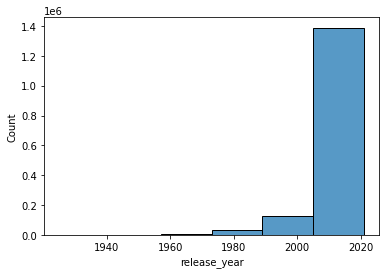

In [ ]:
#univariate Analysis
sns.histplot(df["release_year"], bins = 6)

Here it is observed that year 2020 has got highest releases

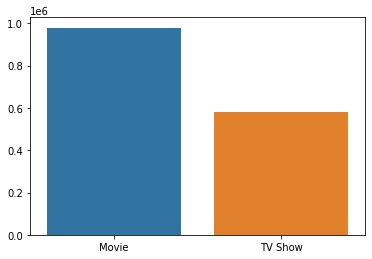

In [ ]:
#Univariate Analysis
x, y = np.unique(df["type"], return_counts=True)
sns.barplot(x,y)

Here we observe Movies are more than TVShows

In [ ]:
#Univariate Analysis
sns.countplot(x="rating", data=df)
plt.xticks(rotation=‌​45)
plt.show()

SyntaxError: ignored

In [ ]:
import matplotlib.pyplot as plt
df_actors=df_final.groupby(["Actors"]).agg({"title":"nunique"}).reset_index().sort_values(by=["title"],axis=1)
df_actors["Actors"].replace(["nan"],["Unknown Actor"],inplace=True)
df_actors=df_actors[df_actors["Actors"] != "Unknown Actor"]
plt.figure(figsize=(15,8))
plt.barh(df_actors[::-1]["Actors"],df_actors[::-1]["title"],color=["red"])
plt.xlabel("Number of Movies")
plt.ylabel("Popular Actors")
plt.show()

KeyError: ignored